<a href="https://colab.research.google.com/github/Arseniy-Polyakov/applied_linguistics_course/blob/main/Task_3_Stylometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данная работа посвящена стилометрии на основе двух художественных произведений "Белая Гвардия" М.А. Булгакова и "12 стульев" И.Ильфа и Е.Петрова

Установим библиотеку для парсинга PDF файлов с произведениями

In [1]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 6.9 MB/s eta 0:00:00


Импортируем необходимые модули для предобработки текстов и расчета статистических метрик для выявления схожести

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from pypdf import PdfReader

reader_ilf_petrov = PdfReader("/content/12_stuliev.pdf")
reader_bulgakov = PdfReader("/content/belaya_gvardia.pdf")

Загрузим модуль для сегментации текста

In [3]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Загрузим список стоп-слов

In [4]:
nltk.download("stopwords")
stop_words = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Распарсим PDF файлы, для того чтобы извлечь тексты произведений

In [5]:
bulgakov_belaya_gvardia = " ".join([page.extract_text().lower() for page in reader_bulgakov.pages])
ilf_petrov_12_styuliev = " ".join([page.extract_text().lower() for page in reader_ilf_petrov.pages])

bulgakov_belaya_gvardia_list = re.split(r"\n| ", bulgakov_belaya_gvardia)
ilf_petrov_12_styuliev_list = re.split(r"\n| ", ilf_petrov_12_styuliev)

Напишем функцию, которая делит произведения на части (главы)

In [6]:
def chapter_division(text: str) -> list:
  """
  Функция, которая делит тексты "Белая Гвардия" Булгакова и "12 стульев" Ильфа и Петрова на главы
  """
  text_by_chapters = []
  for i in range(len(text)-1):
    if text[i] == "часть" and text[i+1] in ["первая"]:
      start_first = i
    elif text[i] == "часть" and text[i+1] in ["вторая"]:
      end_first = i
      first_part = " ".join(text[start_first: end_first])
      text_by_chapters.append(first_part)
    elif text[i] == "часть" and text[i+1] in ["третья"]:
      end_second = i
      second_part = " ".join(text[end_first: end_second])
      third_part = " ".join(text[end_second:])
      text_by_chapters.append(second_part)
      text_by_chapters.append(third_part)
  return text_by_chapters

Применим функцию деления на главы для произведений

In [7]:
bulgakov_by_chapters = chapter_division(bulgakov_belaya_gvardia_list)
ilf_petrov_by_chapters = chapter_division(ilf_petrov_12_styuliev_list)[:3]

In [8]:
def average_metrics(chapter: str) -> dict:
  """
  Функция для определения количественных показателей текста:
  1. Количество предложений
  2. Количество слов
  3. Количество слов (без стоп-слов)
  4. Количество слогов
  5. Количество букв в главе
  6. Количество гласных в главе
  7. Количество согласных в главе
  8. Среднее количество слов в предложении
  9. Среднее количество знаков пунктуации на предложение
  10. Среднее количество слов (без стоп-слов) в предложении
  11. Среднее количество слогов в слове
  12. Среднее количество букв в слове
  13. Среднее количество гласных в слове
  14. Среднее количество согласных в слове
  """
  vowels = ["у", "е", "ы", "а", "о", "э", "я", "и", "ю"]
  сonsonants = ["й", "ц", "к", "н", "г", "ш", "щ", "з", "х", "ф", "в", "п",
                "р", "л", "д", "ж", "ч", "с", "м", "т", "б"]

  sentences = nltk.sent_tokenize(chapter)
  tokens = nltk.word_tokenize(re.sub(r"[^а-яё\s]", "", chapter))
  tokens_without_stopwords = [token for token in tokens if token not in stop_words]
  count_punkt = round(len(re.findall(r"[^\w\s]", chapter)) / len(sentences), 2)

  average_words_per_sent = round(len(tokens) / len(sentences), 2)
  average_words_without_stopwords_per_sent = round(len(tokens_without_stopwords) / len(sentences), 2)

  count_letters, count_vowels, count_consonants = 0, 0, 0
  for character in chapter:
    if ord(character.lower()) in range(1072, 1104):
      count_letters += 1
      if character.lower() in vowels:
        count_vowels += 1
      elif character.lower() in сonsonants:
        count_consonants += 1

  average_syllables_per_word = round(count_vowels / len(tokens), 2)
  average_letters_per_word = round(count_letters / len(tokens), 2)
  average_vowels_per_word = round(count_vowels / len(tokens), 2)
  average_consonants_per_word = round(count_consonants / len(tokens), 2)

  statistics = [len(sentences), len(tokens), len(tokens_without_stopwords),
                count_vowels, count_letters, count_vowels, count_consonants,
                average_words_per_sent, average_words_without_stopwords_per_sent, count_punkt,
                average_syllables_per_word, average_letters_per_word,
                average_vowels_per_word, average_consonants_per_word]
  return statistics

In [9]:
index = ["Количество предложений в главе",
          "Количество слов в главе",
          "Количество слов (без стоп-слов) в главе",
          "Количество слогов в главе",
          "Количество букв в главе",
          "Количество гласных в главе",
          "Количество согласных в главе",
          "Среднее количество слов в предложении",
          "Cреднее количество слов (без стоп-слов) в предложении",
          "Среднее количество знаков пунктуации на предложение",
          "Среднее количество слогов в слове",
          "Среднее количество букв в слове",
          "Среднее количество гласных в слове",
          "Среднее количество согласных в слове"]
data = []
for chapter in bulgakov_by_chapters:
  data.append(average_metrics(chapter))
for chapter in ilf_petrov_by_chapters:
  data.append(average_metrics(chapter))

data.append(average_metrics(bulgakov_belaya_gvardia))
data.append(average_metrics(ilf_petrov_12_styuliev))

data_np = np.array(data)
data_transponented = data_np.T
df = pd.DataFrame(data_transponented,
                  index,
                  columns=["Белая Гвардия 1", "Белая Гвардия 2",
                           "Белая Гвардия 3", "12 стульев 1", "12 стульев 2",
                          "12 стульев 3", "Белая Гвардия", "12 стульев"]
)
df

,Белая Гвардия 1,Белая Гвардия 2,Белая Гвардия 3,12 стульев 1,12 стульев 2,12 стульев 3,Белая Гвардия,12 стульев
Количество предложений в главе,2500.00,1344.00,2516.00,3682.00,4680.00,4324.00,6365.00,12894.00
Количество слов в главе,28052.00,15776.00,29156.00,36114.00,36537.00,47645.00,73038.00,123722.00
Количество слов (без стоп-слов) в главе,18834.00,10453.00,19254.00,25039.00,24662.00,34555.00,48583.00,86681.00
Количество слогов в главе,62249.00,34271.00,63069.00,86459.00,85376.00,121383.00,159713.00,302444.00
Количество букв в главе,149097.00,82019.00,150409.00,206226.00,204253.00,289475.00,381831.00,721690.00
Количество гласных в главе,62249.00,34271.00,63069.00,86459.00,85376.00,121383.00,159713.00,302444.00
Количество согласных в главе,84372.00,46462.00,84757.00,116322.00,115128.00,163520.00,215768.00,407051.00
Среднее количество слов в предложении,11.22,11.74,11.59,9.81,7.81,11.02,11.47,9.60
Cреднее количество слов (без стоп-слов) в предложении,7.53,7.78,7.65,6.80,5.27,7.99,7.63,6.72
Среднее количество знаков пунктуации на предложение,4.11,3.91,4.63,3.14,2.69,4.51,4.27,3.47


Напишем функцию для построения сгруппированных графиков для визуального сравнения метрик

In [77]:
def group_graphic(data: list, title: str, ylabel: str):
  chapters = ["Первая глава", "Вторая глава", "Третья глава", "Весь текст"]
  chapters_np  = np.arange(len(chapters))
  labels = ["Белая Гвардия", "12 стульев"]
  fig, ax = plt.subplots()
  width = 0.45
  multiplier = 0
  pos1 = chapters_np - width
  pos2 = chapters_np
  pos3 = chapters_np + width
  bulgakov = ax.bar(pos1, (data[0], data[1], data[2], data[6]), width=width, label="Белая Гвардия")
  ilf_petrov = ax.bar(pos2, (data[3], data[4], data[5], data[7]), width=width, label="12 стульев")
  ax.bar_label(bulgakov)
  ax.bar_label(ilf_petrov)
  ax.set_xticks(chapters_np-0.16, chapters)
  ax.set_ylabel(ylabel)
  ax.legend(loc="lower right")
  plt.title(title)
  plt.show()

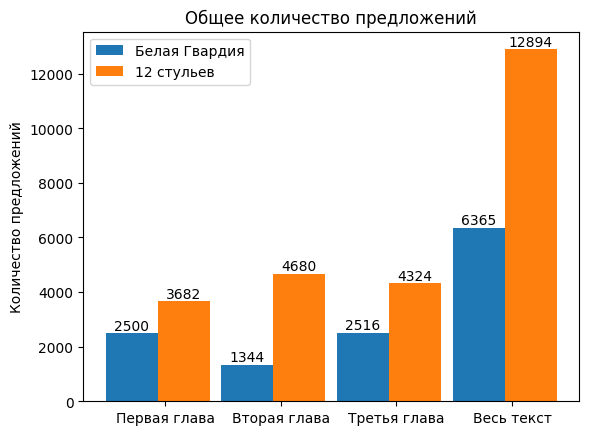

In [62]:
sentences = list(df.loc["Количество предложений в главе"])
group_graphic(sentences, "Общее количество предложений", "Количество предложений")

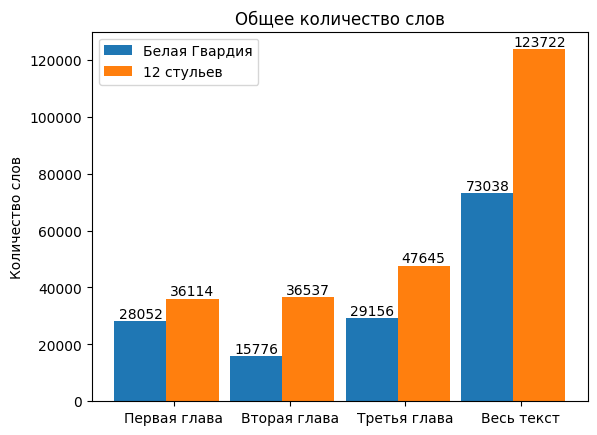

In [63]:
words = list(df.loc["Количество слов в главе"])
group_graphic(words, "Общее количество слов", "Количество слов")

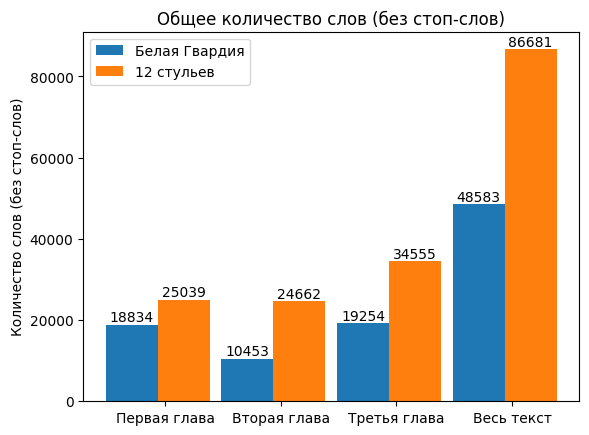

In [64]:
words_without_stopwords = list(df.loc["Количество слов (без стоп-слов) в главе"])
group_graphic(words_without_stopwords, "Общее количество слов (без стоп-слов)", "Количество слов (без стоп-слов)")

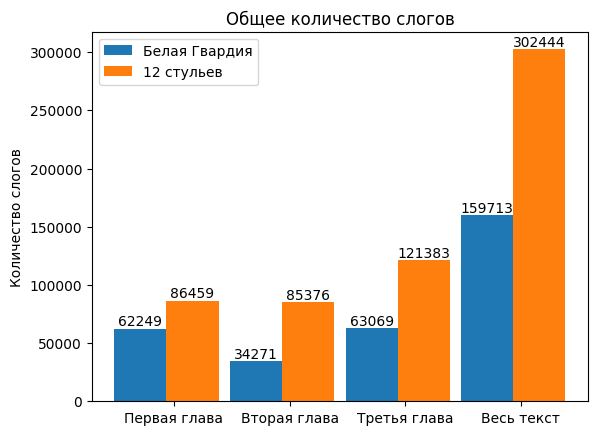

In [65]:
syllables = list(df.loc["Количество слогов в главе"])
group_graphic(syllables, "Общее количество слогов", "Количество слогов")

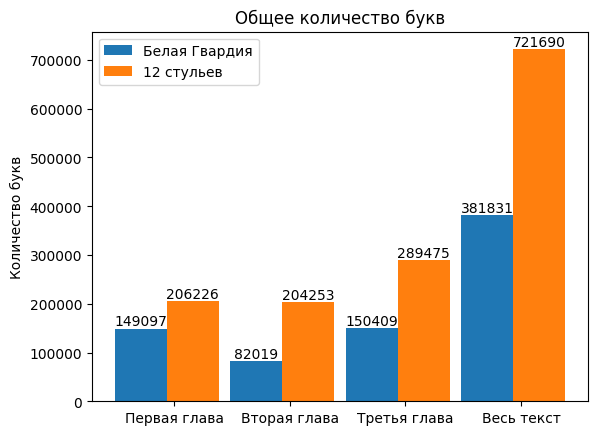

In [66]:
letters = list(df.loc["Количество букв в главе"])
group_graphic(letters, "Общее количество букв", "Количество букв")

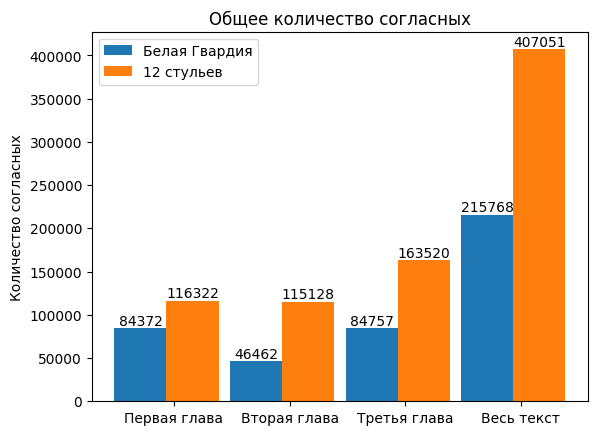

In [67]:
consonants = list(df.loc["Количество согласных в главе"])
group_graphic(consonants, "Общее количество согласных", "Количество согласных")

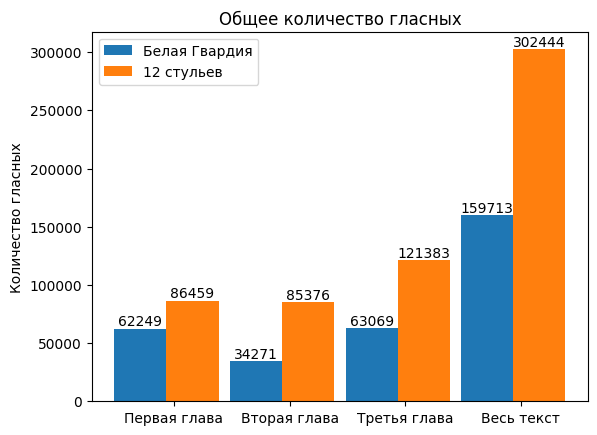

In [69]:
vowels = list(df.loc["Количество гласных в главе"])
group_graphic(vowels, "Общее количество гласных", "Количество гласных")

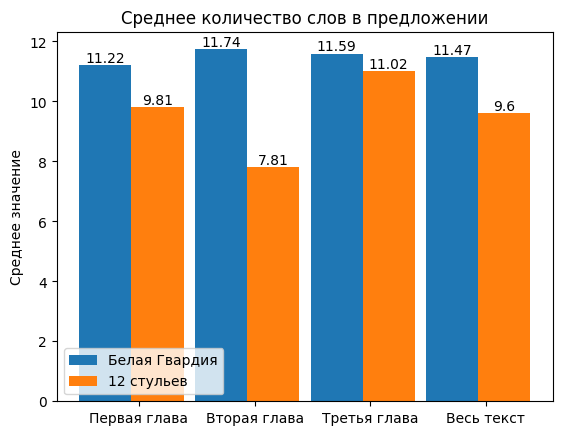

In [71]:
words_per_sent = list(df.loc["Среднее количество слов в предложении"])
group_graphic(words_per_sent, "Среднее количество слов в предложении", "Среднее значение")

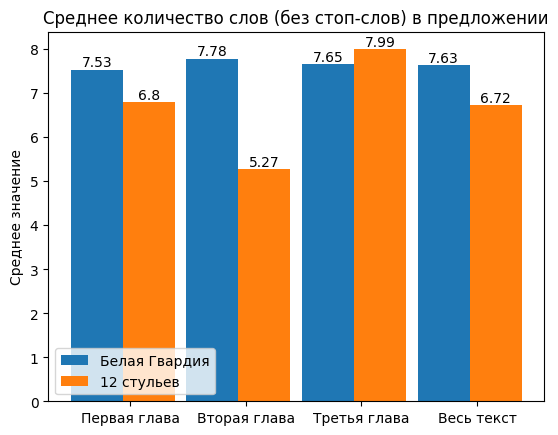

In [73]:
words_per_sent_without_stopwords = list(df.loc["Cреднее количество слов (без стоп-слов) в предложении"])
group_graphic(words_per_sent_without_stopwords, "Среднее количество слов (без стоп-слов) в предложении", "Среднее значение")

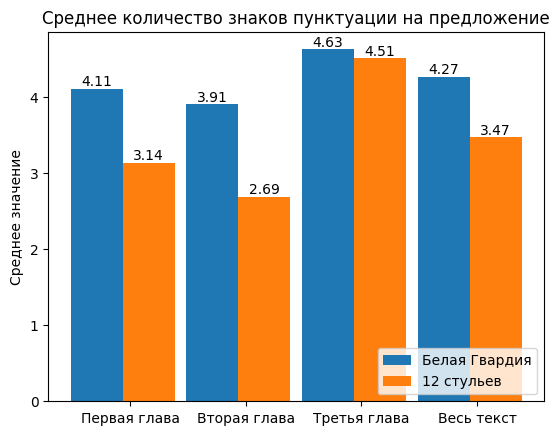

In [78]:
punct_per_sent = list(df.loc["Среднее количество знаков пунктуации на предложение"])
group_graphic(punct_per_sent, "Среднее количество знаков пунктуации на предложение", "Среднее значение")

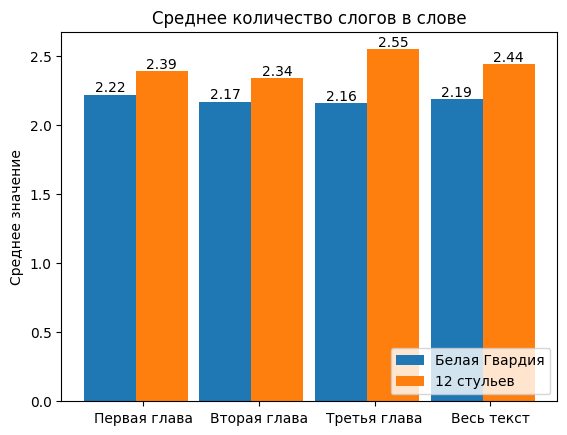

In [79]:
syllables_per_word = list(df.loc["Среднее количество слогов в слове"])
group_graphic(syllables_per_word, "Среднее количество слогов в слове", "Среднее значение")

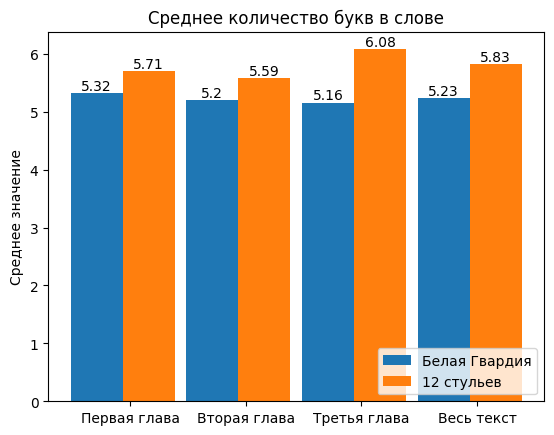

In [80]:
letters_per_word = list(df.loc["Среднее количество букв в слове"])
group_graphic(letters_per_word, "Среднее количество букв в слове", "Среднее значение")

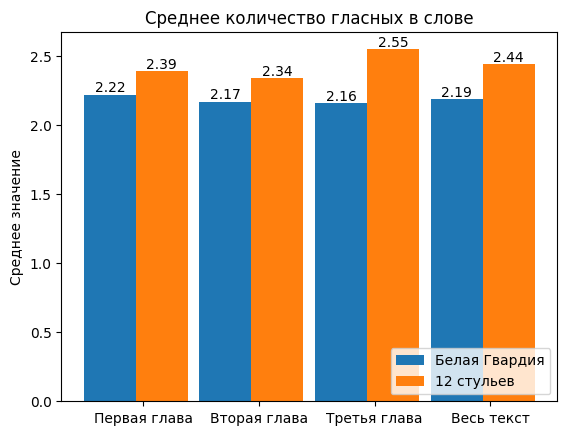

In [81]:
vowels_per_word = list(df.loc["Среднее количество гласных в слове"])
group_graphic(vowels_per_word, "Среднее количество гласных в слове", "Среднее значение")

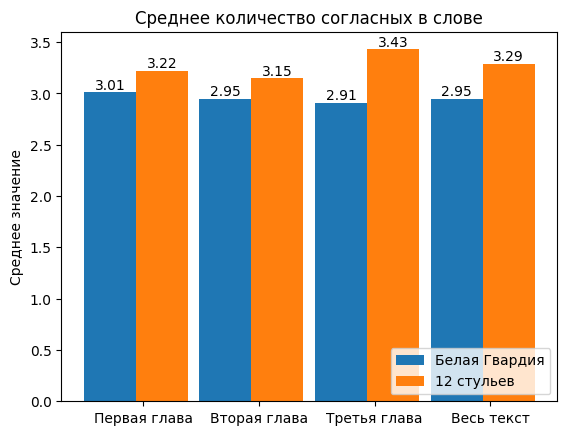

In [82]:
consonants_per_word = list(df.loc["Среднее количество согласных в слове"])
group_graphic(consonants_per_word, "Среднее количество согласных в слове", "Среднее значение")

Вывод: исходя из анализа графиков можно выделить следующие особенности идеостиля Булгакова и Ильфа и Петрова:
1. Предложения у Булгакова являются более распространенными (среднее значение слов (как и учитывая стоп-слова, так и без них) выше, чем у Ильфа и Петрова), как и в отдельных главах, так и во всем тексте.
2. Предложения Булгакова являются более осложненными (это могут быть как и причастные и деепричастные обороты, множество однородных, дополнения, СПП, ССП, а также прямая речь и диалоги) на что свидетельствует большее среднее количество знаков препинания на одно предложение.
3. У Ильфа и Петрова, несмотря на меньший объем предложений и их меньшую распространенность и осложненность, больший размер слов (на что указывают большие средние значения букв, слогов, гласных и согласных).
4. Также на основе данных можно сделать вывод о том, что стиль Булгакова более сложный синтаксически, а стиль Ильфа и Петрова - морфологически и лексически